# BaseBall Case Study

### Problem statement 

 This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

## Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('Baseball.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

##### shape function

shape function gives the dimention of dataframe

In [3]:
df.shape

(30, 17)

we have 30 rows and 17 cloumns in dataframe

##### head() function

head() function is to display the first 5 rows of dataframe

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


##### tail() function

tail() function is use to display last 5 row of data frame

In [5]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


#####  sample() function

sample() function is show the sample randomly

In [6]:
df.sample(15)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


##### dtypes function

dtypes is use to disply the datatype of data frame

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

all the variable values are in numerica values only ERA column has float 64 and remaining all in int64 dtype

### columns function

it shows the columns names of dataframe

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

change the name of coulumns 

In [9]:

df.columns='Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

In [10]:
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


##### info() function

info() function gives the range of index,data coulmns count,column names, non-null count, dtype of dataframe,dtypes total and memory usage 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Game             30 non-null     int64  
 14  Shutouts    

by the info function, we know that we have range index 30 entries it is from 0 to 29, Data columns total 17, names of the columns, in each coulumn we have 30 non-null values and one float64 and 16 int64 dtypes in the data and file is occupid 4.1 KB

##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [12]:
df.isnull()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


we have only 30 rows so we can easily obsever there is a null values is there are no in the dataframe here the data has no null values

##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [13]:
df.isnull().sum()

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Game               0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

here the dataframe has no null values in the dataframe 

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [14]:
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Obsevation:
    
    Here we can see the mean value is more than 50th percentile(median) in the Hit,Homeruns,Errors columns 
    
    And mostly all the columns didn't have much difference in max value and 75th percentile, if we have large difference it means that the column has outliers 


## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

<AxesSubplot:>

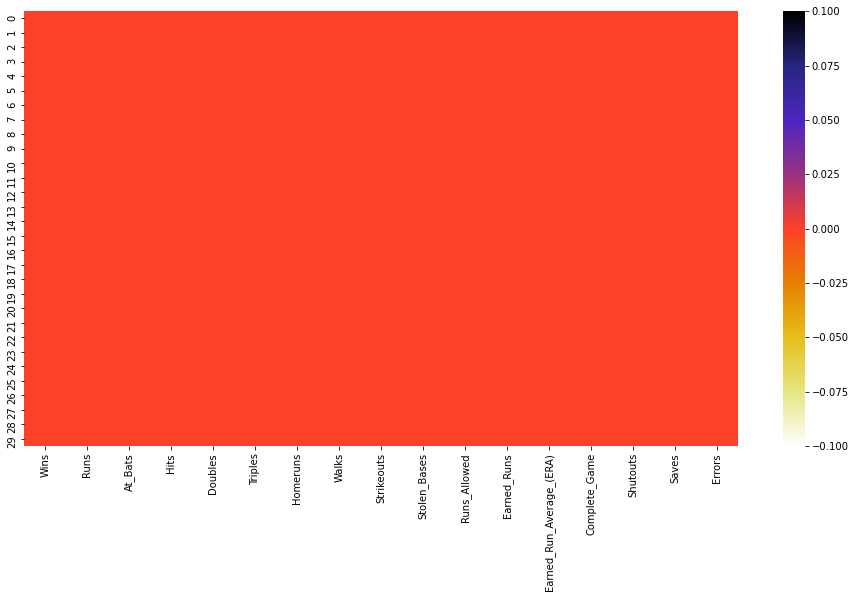

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),cmap='CMRmap_r')

there is no null values in the dataframes, if there is any null values then the shade will be different in the place of null value

## Correlation

corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

 the correlation coefficient interval [−1, +1] is restricted by the individual distributions of the two variables being correlated.

-->0 indicates no linear relationship.


-->+1 indicates a perfect positive linear relationship – as one variable increases in its values, the other variable also increases in its values through an exact linear rule.


-->−1 indicates a perfect negative linear relationship – as one variable increases in its values, the other variable decreases in its values through an exact linear rule.

In [16]:
dfcor=df.corr()
dfcor

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

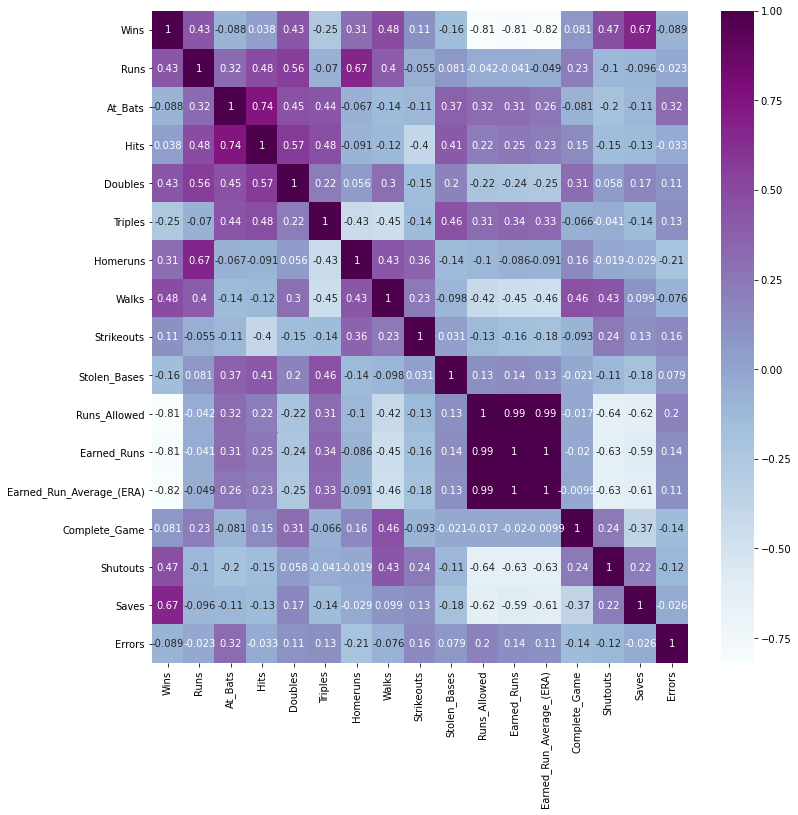

In [17]:
#plot the correlation in heatmap
plt.figure(figsize=(12,12))
sns.heatmap(dfcor,cmap='BuPu',annot=True)

here the plot shows that correlation we can notice that color variation dark color in dicate the best correlation as well as light color is says that there is not much relation in both the variables

here we can see our target variable is has less correlated to 3columns['Runs_Allowed','Earned_Runs','Earned_Run_Average_(ERA)]
if we drop these columns there is no effect of our prediction

the 

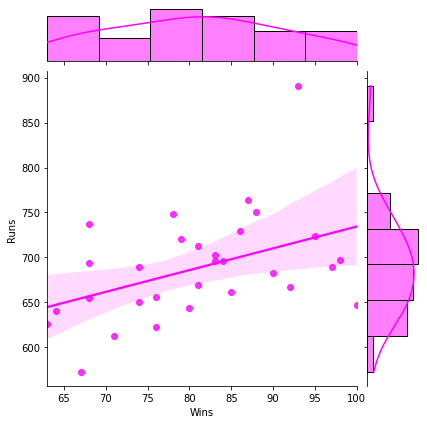

In [18]:
sns.jointplot(x=df['Wins'],y=df['Runs'],color='fuchsia',kind='reg')

here we can see the 2 type of graphs one is histogram with the prabability density it shows the distribution of the feature and the plot shows scatter plot with best fit line in the middle of the plot 

lmplot is a 2D scatterplot with an optional overlaid regressionline. This is useful for comparing numeric variables

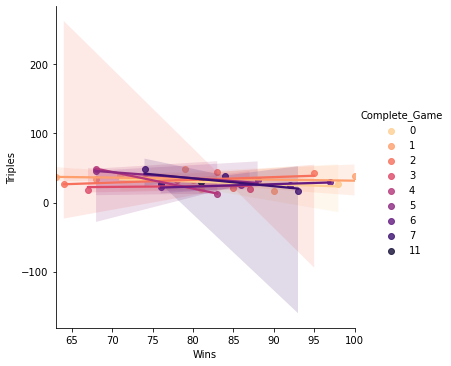

In [19]:
sns.lmplot(x="Wins", y="Triples", hue="Complete_Game", data=df,palette='magma_r')

here lmplot showing that the overlaid regressionlines,here we compairing the data with the hue as Complete_Game

<AxesSubplot:xlabel='Wins', ylabel='Walks'>

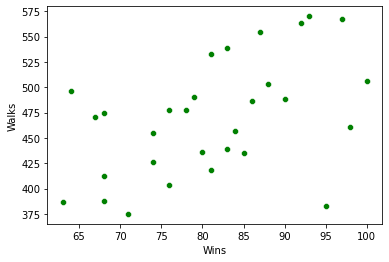

In [20]:
sns.scatterplot(x=df['Wins'], y=df['Walks'],color='Green')

 The scatter plot shows the most of the points are in between 75 to 85 on X-axis that is indicate Wins and 425 to 475 on Y-axis that indicates Walks

<AxesSubplot:xlabel='Wins', ylabel='Errors'>

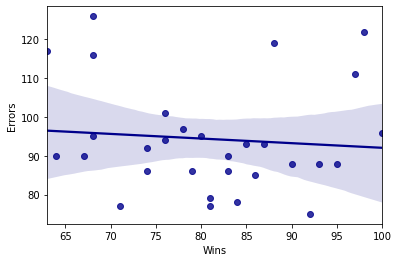

In [21]:
sns.regplot(x=df['Wins'],y=df['Errors'],color='darkblue')

regplot  shows that no. of mutual exclusive options for estimating the linear regression in both columns,
we have a bestfit line at 95 in Errors 

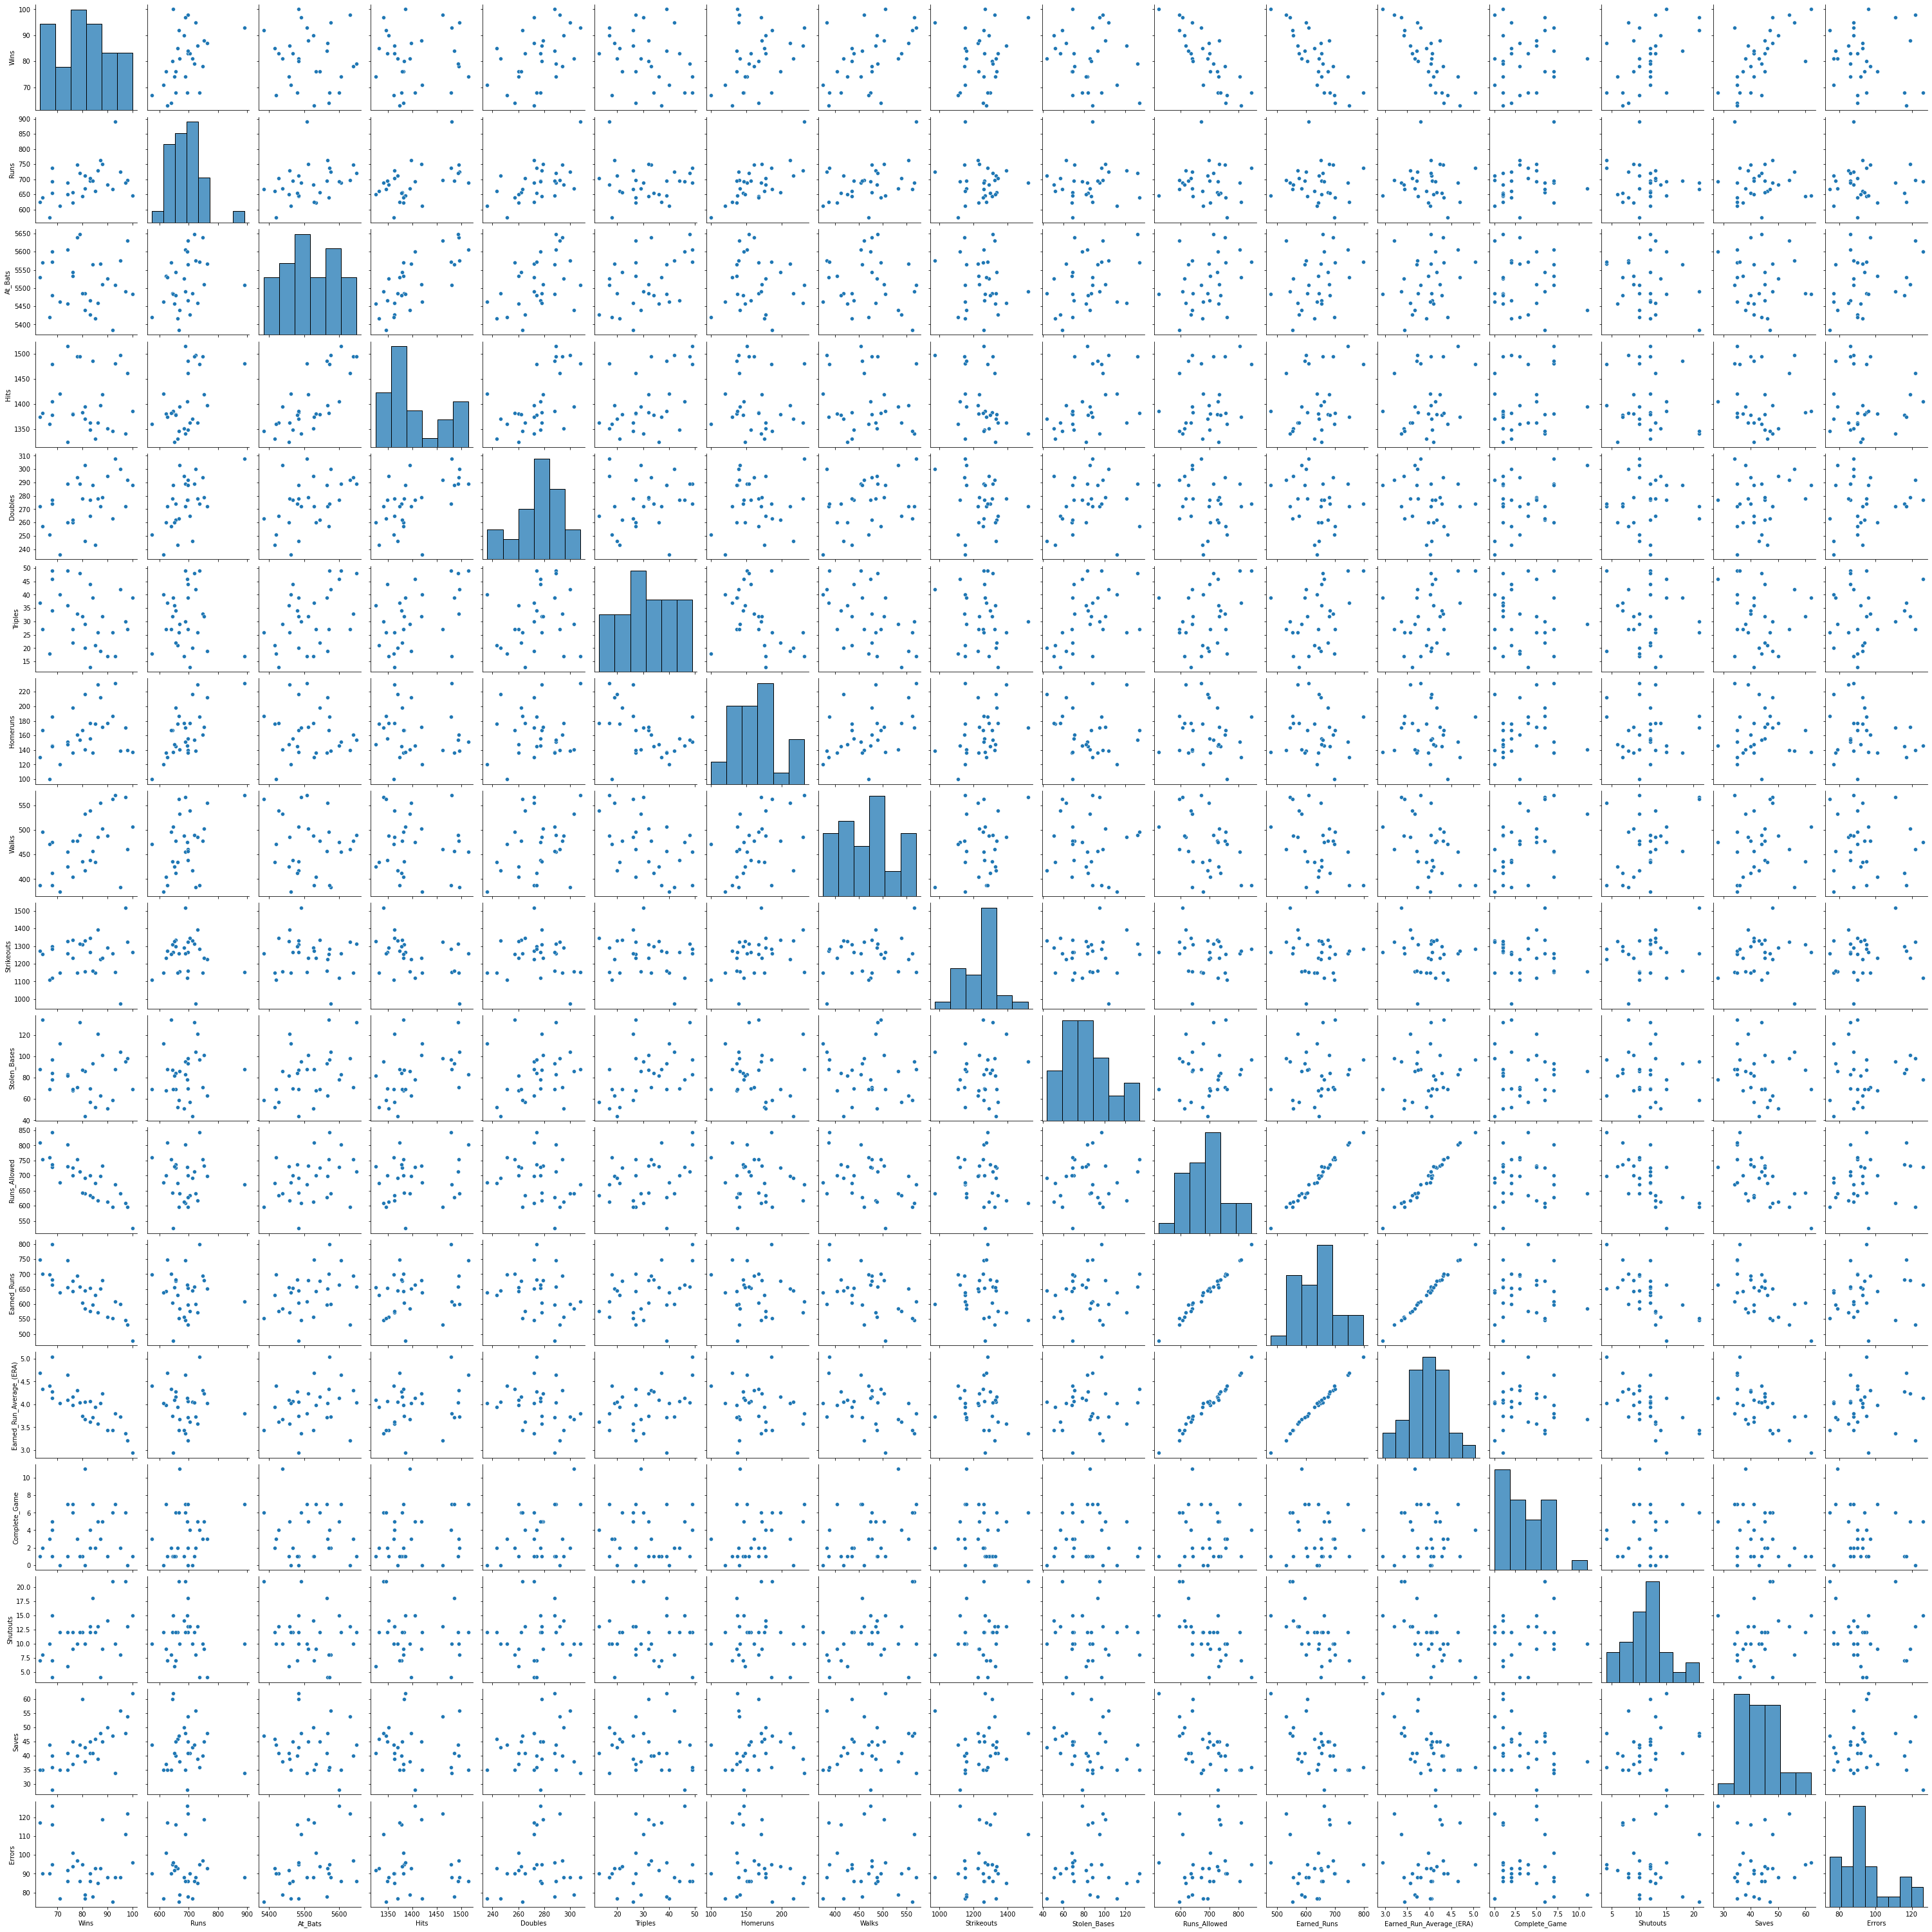

In [22]:
sns.pairplot(df)

we have 17 columns so we cant't predict it clearly  

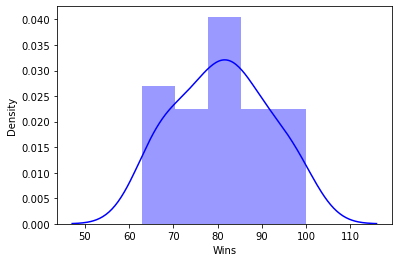

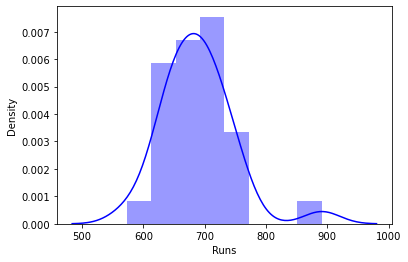

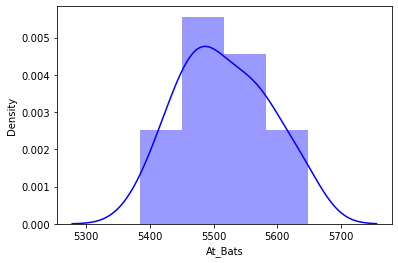

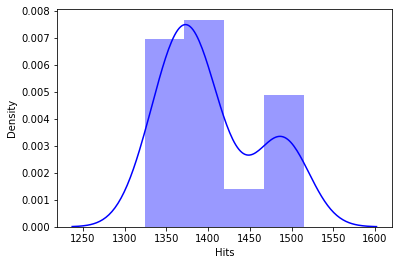

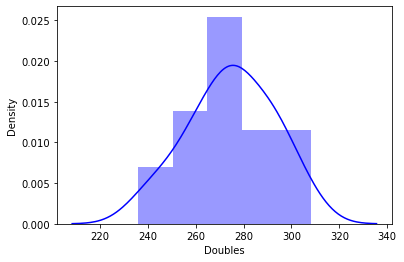

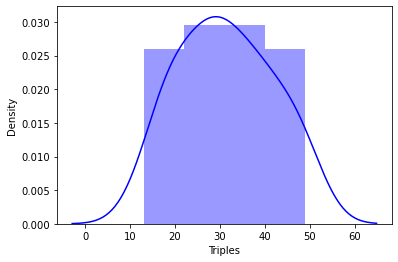

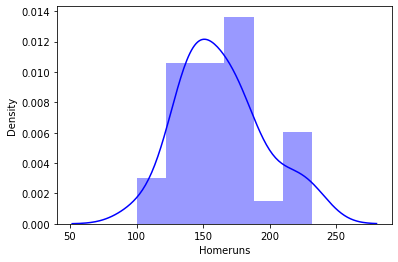

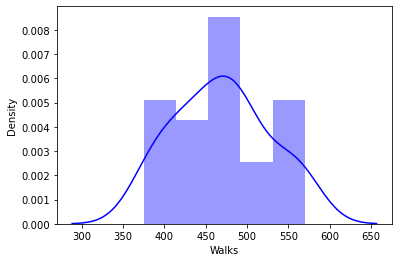

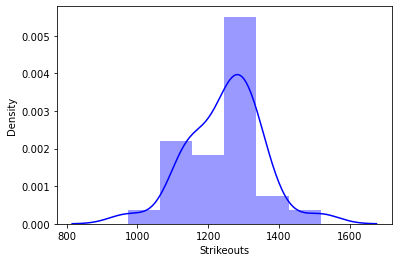

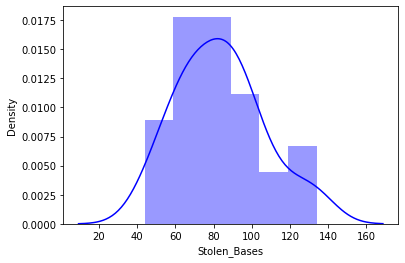

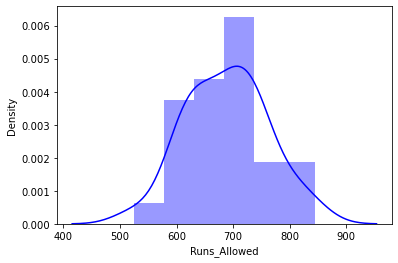

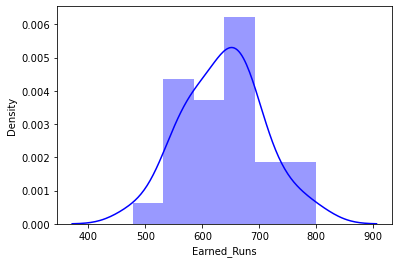

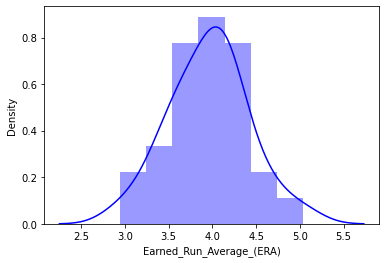

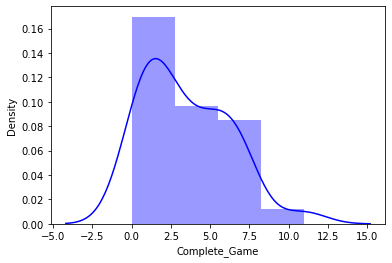

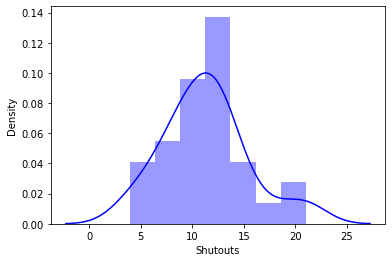

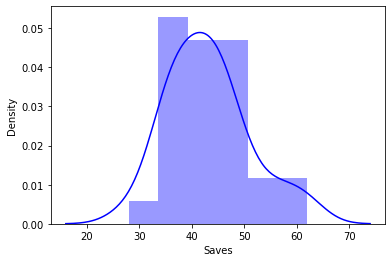

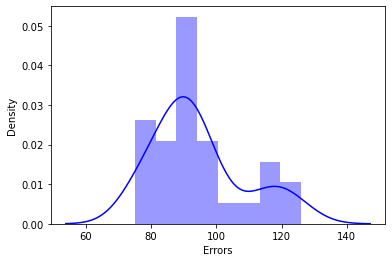

In [23]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna(),color='blue')
    plt.show()

Above plots shows that distribution among the feature observations it is skewed or normally distributed

Here the columns are Wins,At_Bats,Doubles,Triples Homeruns,Walks,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Savesare almost nomally distributed 

And some coloumns are slightly skewed in graph Runs,Hits,Stickeouts,Complete_Game,Shutouts,Errors

In [24]:
df.skew()

Wins                        0.047089
Runs                        1.200786
At_Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen_Bases                0.479893
Runs_Allowed                0.045734
Earned_Runs                 0.058710
Earned_Run_Average_(ERA)    0.053331
Complete_Game               0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

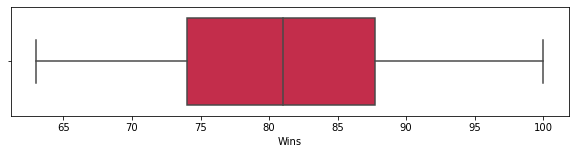

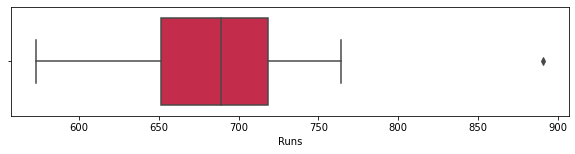

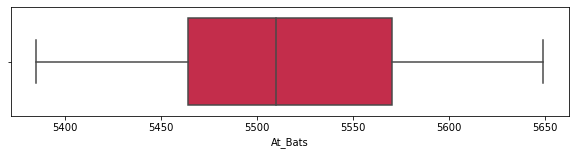

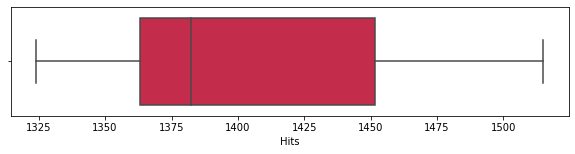

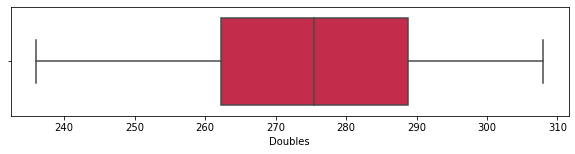

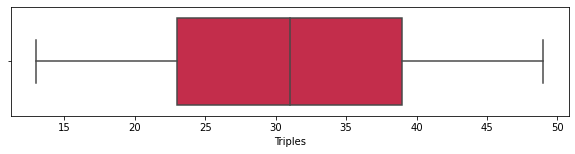

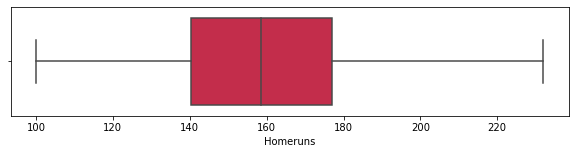

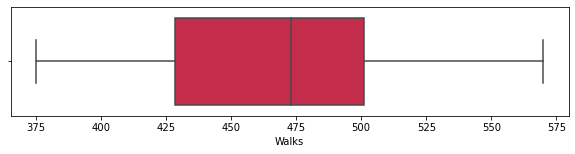

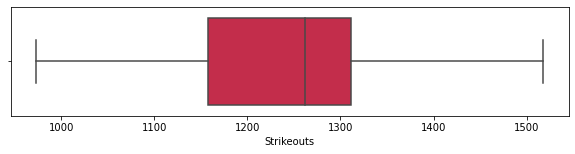

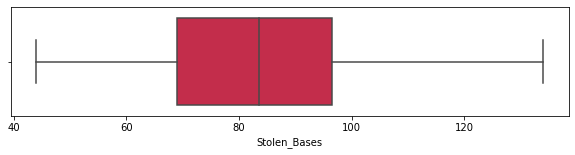

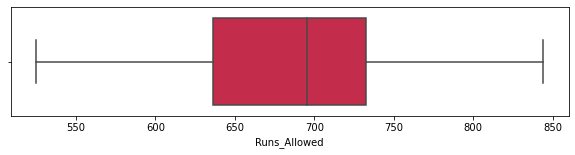

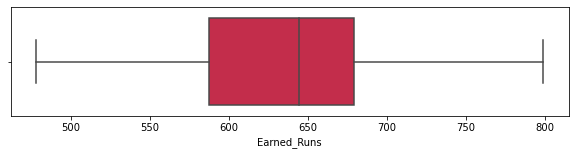

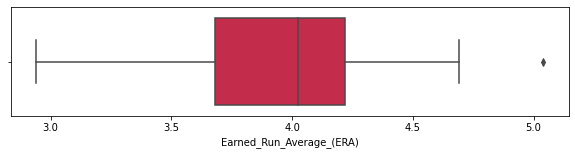

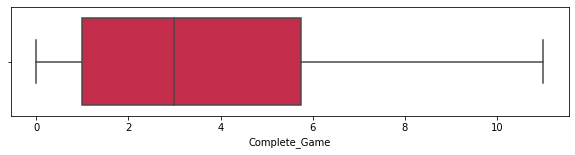

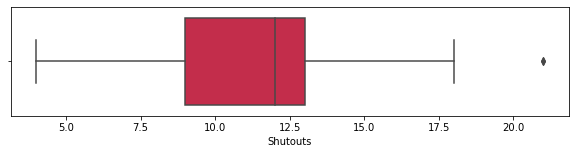

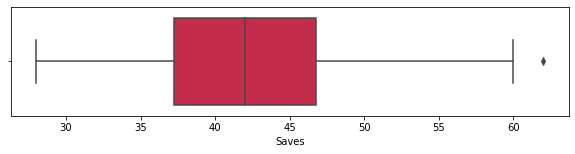

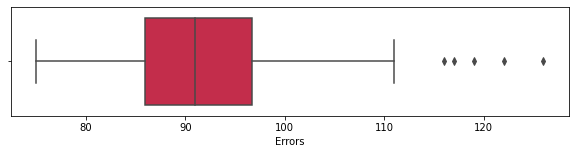

In [25]:
for cols in df:
    plt.figure(figsize=(10,2))
    sns.boxplot(df[cols],color='crimson')
    plt.show()

we have outliers one outlier Runs,Earned_Run_Average_(ERA),Shutouts,Saves and 5 outliers in Errors

##### Runs Feature

we have only one outlier but is very far from whisker and data distribution is slight skewed

In [26]:
IQR=df['Runs'].quantile(0.75)-df['Runs'].quantile(0.25)

In [27]:
lower_boundary=df['Runs'].quantile(0.25)-(IQR*1.5)
upper_boundary=df['Runs'].quantile(0.75)+(IQR*1.5)

In [28]:
print("lower_boundary:",lower_boundary)
print("uppper_boundary",upper_boundary)

lower_boundary: 550.75
uppper_boundary 818.75


In [29]:
df.loc[df['Runs']>818.75,'Runs']=818.75

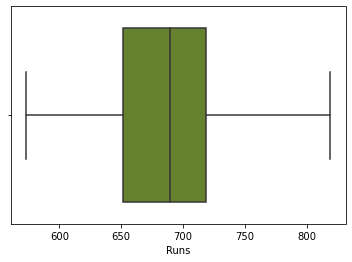

In [30]:
sns.boxplot(df['Runs'],color='olivedrab')
plt.show()

<AxesSubplot:xlabel='Runs', ylabel='Density'>

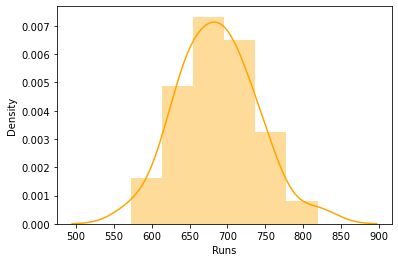

In [31]:
sns.distplot(df['Runs'],color='orange')

outlier and skewness both are removed in Runs

##### Earned_Run_Average_(ERA) feature

In [32]:
IQR=df['Earned_Run_Average_(ERA)'].quantile(0.75)-df['Earned_Run_Average_(ERA)'].quantile(0.25)
lower_boundary=df['Earned_Run_Average_(ERA)'].quantile(0.25)-(IQR*1.5)
upper_boundary=df['Earned_Run_Average_(ERA)'].quantile(0.75)+(IQR*1.5)
print("lower_boundary:",lower_boundary)
print("uppper_boundary",upper_boundary)

lower_boundary: 2.8762499999999993
uppper_boundary 5.026250000000001


In [33]:
df.loc[df['Earned_Run_Average_(ERA)']>5.026,'Earned_Run_Average_(ERA)']=5.026

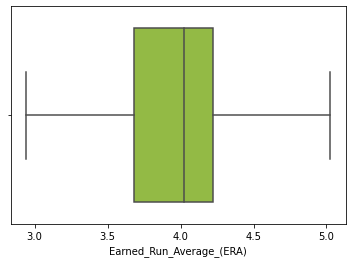

In [34]:
sns.boxplot(df['Earned_Run_Average_(ERA)'],color='yellowgreen')
plt.show()

<AxesSubplot:xlabel='Earned_Run_Average_(ERA)', ylabel='Density'>

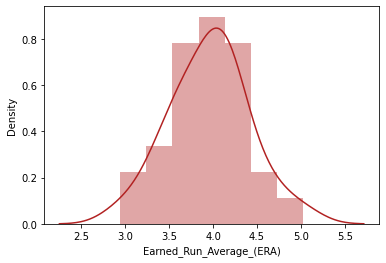

In [35]:
sns.distplot(df['Earned_Run_Average_(ERA)'],color='firebrick')

in Earned_Run_Average_(ERA) feature, we removed skewness and outlier

#### Shutouts feature

In [36]:
uppper_boundary=df['Shutouts'].mean() + 3* df['Shutouts'].std()
lower_boundary=df['Shutouts'].mean() - 3* df['Shutouts'].std()
print("lower_boundary:",lower_boundary)
print("uppper_boundary",uppper_boundary)

lower_boundary: -1.0605322952003036
uppper_boundary 23.660532295200305


In [37]:
IQR=df['Shutouts'].quantile(0.75)-df['Shutouts'].quantile(0.25)
lower_boundary=df['Shutouts'].quantile(0.25)-(IQR*1.5)
upper_boundary=df['Shutouts'].quantile(0.75)+(IQR*1.5)
print("lower_boundary:",lower_boundary)
print("uppper_boundary",upper_boundary)

lower_boundary: 3.0
uppper_boundary 19.0


In [38]:
df.loc[df['Shutouts']>19,'Shutouts']=19

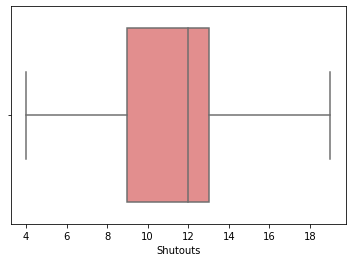

In [39]:
sns.boxplot(df['Shutouts'],color='lightcoral')
plt.show()

<AxesSubplot:xlabel='Shutouts', ylabel='Density'>

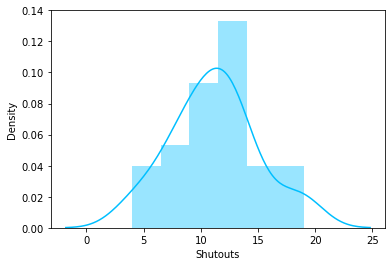

In [40]:
sns.distplot(df['Shutouts'],color='deepskyblue')

Shutouts feature is cleared with skewness and outliers

##### Saves feature

<AxesSubplot:xlabel='Saves'>

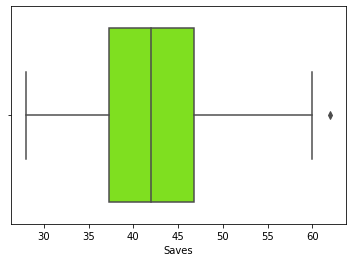

In [41]:
sns.boxplot(df['Saves'],color='chartreuse')

<AxesSubplot:xlabel='Saves', ylabel='Density'>

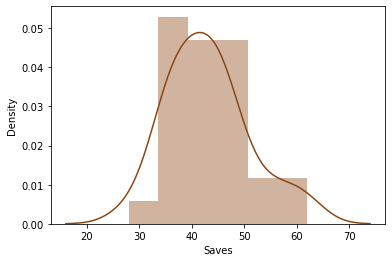

In [42]:
sns.distplot(df['Saves'],color='saddlebrown')

Saves feature has only one outlier and it is close to whisker and the it has normally distributed so there is no need to remove outlier

##### Errors feature

In [43]:
IQR=df['Errors'].quantile(0.75)-df['Errors'].quantile(0.25)
lower_boundary=df['Errors'].quantile(0.25)-(IQR*1.5)
upper_boundary=df['Errors'].quantile(0.75)+(IQR*1.5)
print("lower_boundary:",lower_boundary)
print("uppper_boundary",upper_boundary)

lower_boundary: 69.875
uppper_boundary 112.875


In [44]:
df.loc[df['Errors']>112.875,'Errors']=112.875

<AxesSubplot:xlabel='Errors'>

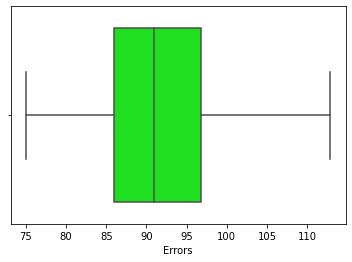

In [45]:
sns.boxplot(df['Errors'],color='lime')

In [46]:
df['Errors'].skew()

0.5040191068259042

In [47]:
df1=df

## Spliting features and target variable

In [48]:
df_x=df1.drop('Wins',axis=1)
y=df1['Wins']

here our target variable is Wins

## Scaling the dataframe

In [49]:
scaler=StandardScaler()
x=scaler.fit_transform(df_x)

In [50]:
x

array([[ 0.75905161,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50719031, -0.5398062 , -0.84415269,  1.67160651,
        -0.44746715],
       [ 0.20231435, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25628979, -0.5398062 ,  0.22214544,  0.24987932,
        -0.6213815 ],
       [-0.33453945, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64192209,  2.77264091, -0.31100362, -0.65485616,
        -1.23008175],
       [-1.26906272,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05419212,  1.3004422 , -0.57757816, -0.78410408,
         0.68297617],
       [ 0.06313003,  1.28073815,  1

### Find the best random state

In [51]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is",maxAccu,"on random_state", maxRS)

Best r2_score is 0.7977339174979012 on random_state 30


### train_test_split

In [52]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=30)

In [53]:
x_train.shape

(20, 16)

In [54]:
y_train.shape

(20,)

In [55]:
x_test.shape

(10, 16)

In [56]:
x_test.shape

(10, 16)

defining function for test and train models

In [57]:
def train_n_score(model):
    print('model:',model)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print('median_absolute_error:',median_absolute_error(y_test,pred))
    scr=cross_val_score(model,x,y,cv=5)
    print("Cross validation score:",scr.mean())

### Machine Learning Algorithms

In [58]:
train_n_score(LinearRegression())

model: LinearRegression()
r2_score: 0.7977339174979012
mean_absolute_error: 4.213772794740473
mean_squared_error: 22.69627711756051
median_absolute_error: 3.7220657944063475
Cross validation score: -0.16946750762006751


In [59]:
train_n_score(RandomForestRegressor())

model: RandomForestRegressor()
r2_score: 0.4965151056055609
mean_absolute_error: 6.306000000000002
mean_squared_error: 56.496040000000015
median_absolute_error: 5.619999999999997
Cross validation score: -0.7535868901619327


In [60]:
train_n_score(BaggingRegressor())

model: BaggingRegressor()
r2_score: 0.4875501292219947
mean_absolute_error: 6.1
mean_squared_error: 57.50199999999999
median_absolute_error: 4.850000000000001
Cross validation score: -1.0061435359801447


In [61]:
train_n_score(AdaBoostRegressor())

model: AdaBoostRegressor()
r2_score: 0.5104204418302982
mean_absolute_error: 6.2233333333333345
mean_squared_error: 54.93572222222224
median_absolute_error: 5.5
Cross validation score: -0.5771514092995972


In [62]:
train_n_score(KNeighborsRegressor())

model: KNeighborsRegressor()
r2_score: 0.4089296854112824
mean_absolute_error: 6.94
mean_squared_error: 66.32400000000001
median_absolute_error: 6.300000000000004
Cross validation score: -0.1630449746376013


In [63]:
train_n_score(ElasticNet())

model: ElasticNet()
r2_score: 0.7805245303681051
mean_absolute_error: 4.092075731572509
mean_squared_error: 24.627342447394927
median_absolute_error: 3.5276237548070313
Cross validation score: 0.39726263976692594


In [64]:
train_n_score(SVR())

model: SVR()
r2_score: 0.01511083719743056
mean_absolute_error: 8.93348108687849
mean_squared_error: 110.51441295807633
median_absolute_error: 7.911436183778314
Cross validation score: -0.37012051757270925


after train and test with different machine learning algorithms we got our best fit model is ElastiNet 

## Hyper Parameter Tunning

In [71]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1]}
gcv_en = GridSearchCV(ElasticNet(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gcv_en.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             verbose=2)

In [72]:
gcv_en_pred=gcv_en.predict(x_test)

In [78]:
r2_score(y_test,gcv_en_pred)

0.8106839728875699

## Saving the model

In [79]:
import joblib
joblib.dump(gcv_en,"Baseball-project.pkl")

['Baseball-project.pkl']

## Load the saved model

In [80]:
model=joblib.load("Baseball-project.pkl")

In [81]:
pred=model.predict(x_test)

In [83]:
r2_score(y_test,pred)

0.8106839728875699